# PROPOSAL and EcoMug - underground water muography simulation

how to run the simulation:
1. everything is configured in `config.py`
2. run in two seperate terminals:
* `dask scheduler`
* `dask worker localhost:8786` (important! run in `/computation`) 
* `dask worker localhost:8786 --nworkers 23 --nthreads 1 --memory-limit="4 GiB" --local-directory /tmp` (optimized for TU Dortmund phobos server)
3. continue with cells below


The `config.py` is currently set to a realistic simulation of the 3D Detector.
Furthermore the parameter `v_cut` from PROPOSAL is very time sensitive. (increase for quicker, but less accurate simulations of PROPOSAL)

In [1]:
# Set your hdf_folder in config.py!
# dont forget to set the correct env variables (see README.me)

now you can run the next two cells. First it creates all needed muons with EcoMug. Then they get propagated with PROPOSAL.

In [2]:
# !python d_EM.py

In [3]:
# !python d_pp.py

# Muon flux plots - EcoMug

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from tqdm import tqdm
from importlib import reload
import py_library.stopwatch as stopwatch
import py_library.my_plots_library as plib
import py_library.simulate_lib as slib
import config as cfg

# os.chdir(os.path.dirname(__file__))
reload(stopwatch)
reload(plib)
reload(slib)
reload(cfg)

plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.labelsize'] = 14
plt.rcParams.update({'figure.dpi':70})

df_EM = pd.read_hdf(cfg.hdf_folder+cfg.file_name, key='main')

if cfg.param == 'gaisser_samp':
    weights_EM = cfg.get_weights("counts", df_EM['energy'], df_EM['theta'])
else:
    weights_EM = np.ones(len(df_EM['energy']))

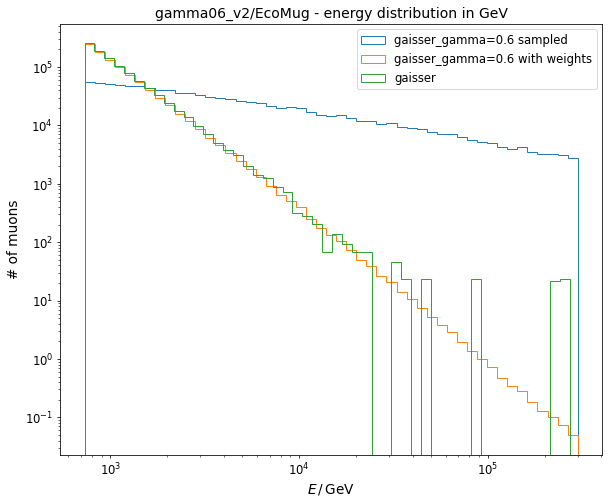

In [5]:
# EcoMug: energy distribution
reload(cfg)
df_EM_original = pd.read_hdf('/scratch/mschoenfeld/data_hdf/test3/EcoMug_1e6_gaisser_min730_max3e5_60deg_3D.hdf', key='main')
df_EM_sampled   = pd.read_hdf('/scratch/mschoenfeld/data_hdf/test3/EcoMug_1e6_gaisser_weighted_min730_max3e5_60deg_3D.hdf', key='main')
# df_EM = df_EM_sampled
gamma = 0.6
if cfg.param == 'gaisser_samp':
    weights_ = cfg.get_weights("counts", df_EM_sampled['energy'], df_EM_sampled['theta'])
else:
    weights_ = np.ones(len(df_EM['energy']))

plib.plot_hist(
    df_EM_sampled['energy'], 
    xlog=True,
    label=f'gaisser_gamma={gamma} sampled' ,
    binsize=50,
    show_or_multiplot='multi',
    histtype='step')

plib.plot_hist(
    df_EM_sampled['energy'], 
    label=f'gaisser_gamma={gamma} with weights' ,
    xlog=True,
    binsize=50,
    show_or_multiplot='multi',
    weights=weights_,
    histtype='step'
)

plib.plot_hist(
    df_EM_original['energy'], 
    name=f'{cfg.subfolder}EcoMug - energy distribution in GeV',
    label='gaisser' ,
    ylabel = '# of muons',
    xlabel1 = 'E',
    xlabel2 = 'GeV',
    xlog=True,
    binsize=50,
    show_or_multiplot='show',
    savefig=False,
    histtype='step')

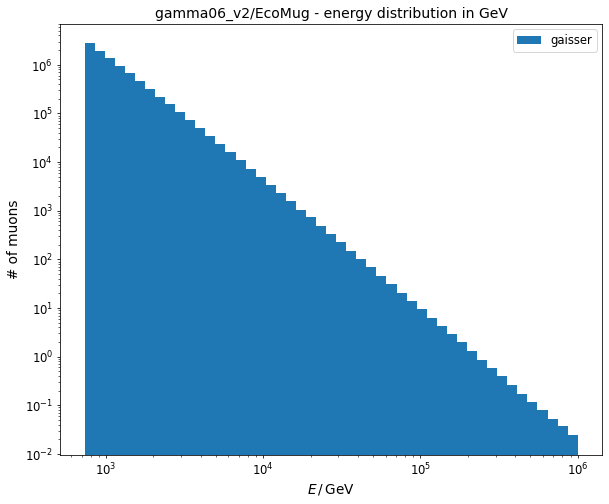

In [6]:
# EcoMug: energy distribution
plib.plot_hist(
    df_EM['energy'], 
    name=f'{cfg.subfolder}EcoMug - energy distribution in GeV',
    label='gaisser' ,
    ylabel = '# of muons',
    xlabel1 = 'E',
    xlabel2 = 'GeV',
    xlog=True,
    binsize=50,
    show_or_multiplot='show',
    savefig=False,
    weights=weights_EM)

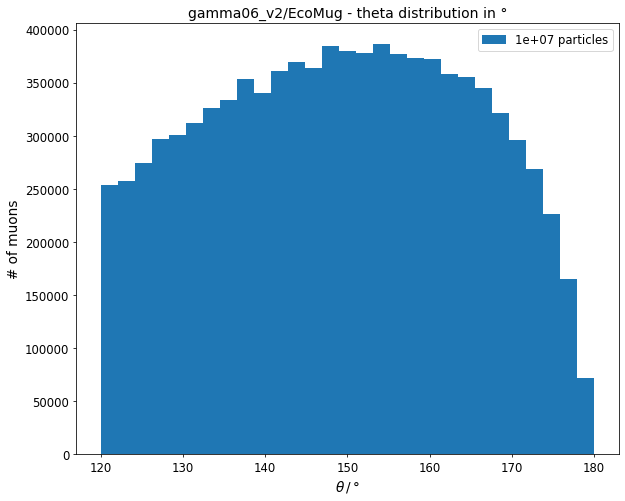

In [7]:
# EcoMug: theta distribution in °
plib.plot_hist(
    np.degrees(df_EM['theta']), 
    name=f'{cfg.subfolder}EcoMug - theta distribution in °',
    ylabel = '# of muons',
    xlabel1 = r'\theta',
    xlabel2 = '°',
    xlog=False,
    binsize=30,
    show_or_multiplot=cfg.show_or_multiplot,
    weights=weights_EM,
    savefig=True)

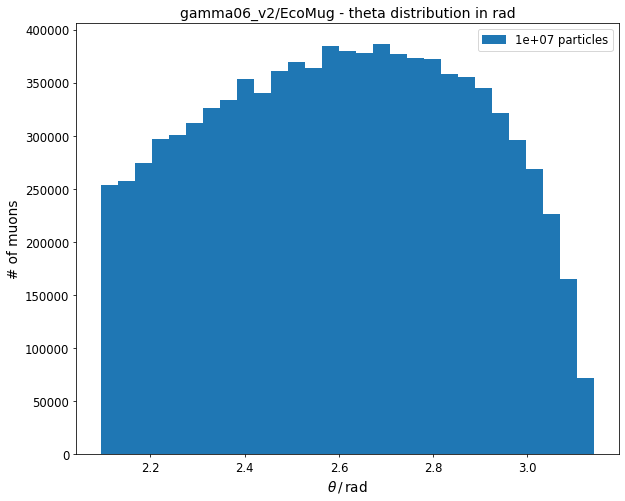

In [8]:
# EcoMug: theta distribution in rad
plib.plot_hist(
    df_EM['theta'], 
    name=f'{cfg.subfolder}EcoMug - theta distribution in rad',
    ylabel = '# of muons',
    xlabel1 = r'\theta',
    xlabel2 = 'rad',
    xlog=False,
    binsize=30,
    show_or_multiplot=cfg.show_or_multiplot,
    weights=weights_EM,
    savefig=True)

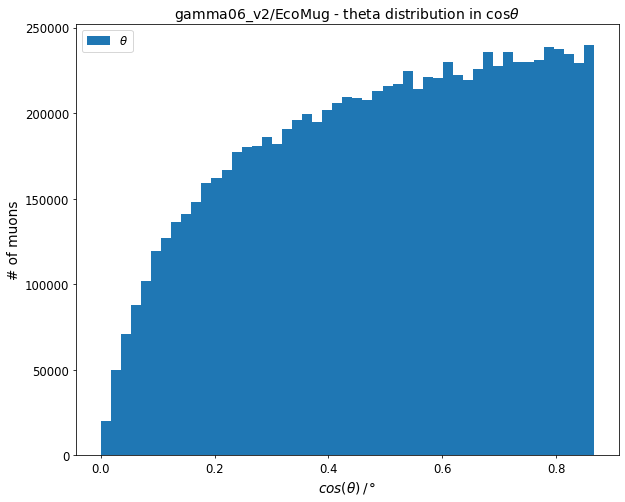

In [9]:
# EcoMug: theta distribution in cos(theta)
a = 1/2*np.pi - df_EM['theta']
plib.plot_hist(
    np.cos(a), 
    ylabel='# of muons',
    xlabel1=r'cos(\theta)',
    xlabel2='°',
    name=fr'{cfg.subfolder}EcoMug - theta distribution in cos$\theta$',
    label=r'$\theta$',
    xlog=False,
    binsize=50,
    show_or_multiplot=True,
    weights=weights_EM,
    savefig=True)

myons with more than 600 GeV = 10000000 (100.00%)


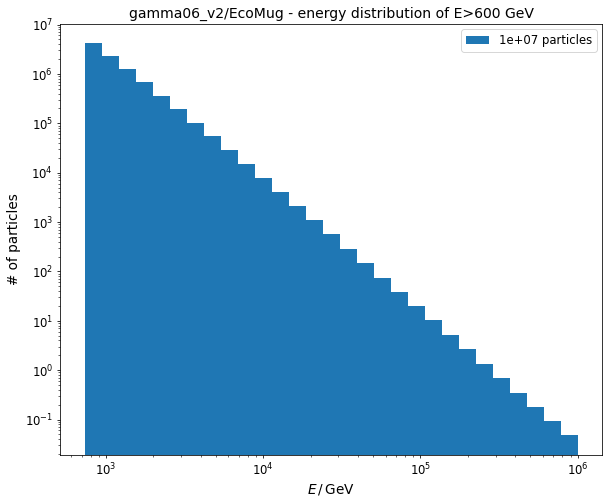

In [10]:
# looking how many muons are over energy_threshold for setting the energy threshold
energy_threshold = 600  # GeV
a = []
for i in df_EM['energy']:
    if (i>energy_threshold):
        a.append(i)

len_a = len(a)
print(f'myons with more than {energy_threshold} GeV = {len_a} ({len_a/cfg.STATISTICS*100:.2f}%)')
if len_a > 100:
    plib.plot_hist(
        a, 
        name=f'{cfg.subfolder}EcoMug - energy distribution of E>{energy_threshold} GeV',
        xlabel1 = 'E',
        xlabel2 = 'GeV',
        show_or_multiplot=cfg.show_or_multiplot,
        xlog=True,
        weights=weights_EM
    )

# PROPOSAL Plots

In [11]:
reload(cfg)
df_pp = pd.read_hdf(cfg.hdf_folder+cfg.file_name_results, key='main')

if cfg.param == 'gaisser_samp':
    weights_pp = cfg.get_weights("counts", df_pp['energies_i']/1000, df_pp['theta_i'])
else:
    weights_pp = np.ones(len(df_pp['energies_i']))

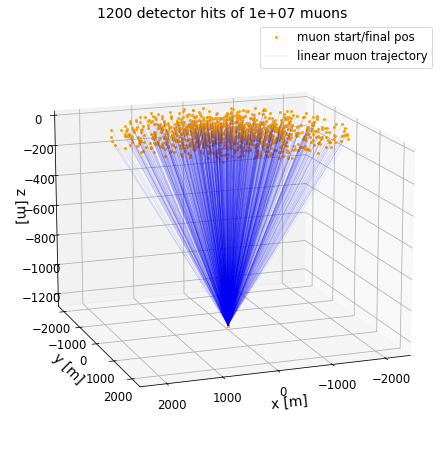

In [12]:
# 3D plot
reload(cfg)
load_lines = 1200
df = pd.read_hdf(cfg.hdf_folder+cfg.file_name_results, key='main', stop=load_lines)
if len(df) < load_lines:
    load_lines = len(df)

start_points = np.zeros(shape=(load_lines, 3), dtype=np.float64)
end_points = np.zeros(shape=(load_lines, 3), dtype=np.float64)
start_end_points = np.zeros(shape=(load_lines*2, 3), dtype=np.float64)

for i in range(load_lines):
    start_points[i] = [df['point1x'][i], df['point1y'][i], df['point1z'][i]]
    end_points[i] = [df['point2x'][i], df['point2y'][i], df['point2z'][i]]
    start_end_points[i*2] = start_points[i]
    start_end_points[i*2+1] = end_points[i]
# start_end_points = df['start_end_points']
plib.plot_3D_start_end(
    start_end_points/100,
    elev=15, azim=70, alpha=0.14, dpi=1, show=cfg.show_plots,
    title=f'{load_lines} detector hits of {cfg.STATISTICS:.0e} muons',
    name=f'{cfg.subfolder}PP - 3D_start_end')

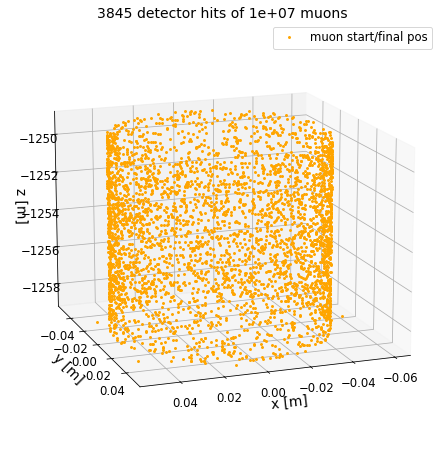

In [13]:
load_lines = int(1e4)
df = pd.read_hdf(cfg.hdf_folder+cfg.file_name_results, key='main', stop=load_lines)
if len(df) < load_lines:
    load_lines = len(df)
# df = df[df['point2z'] <= cfg.detector_bottom_depth]
# df['point2z'] = -125900

reload(plib)

end_points = np.column_stack((df['point2x'], df['point2y'], df['point2z']))
plib.plot_3D_end(
    end_points/100,
    elev=15, azim=70, alpha=0.14, dpi=1, show=cfg.show_plots,
    title=f'{load_lines} detector hits of {cfg.STATISTICS:.0e} muons',
    name=f'{cfg.subfolder}PP - 3D_start_end')

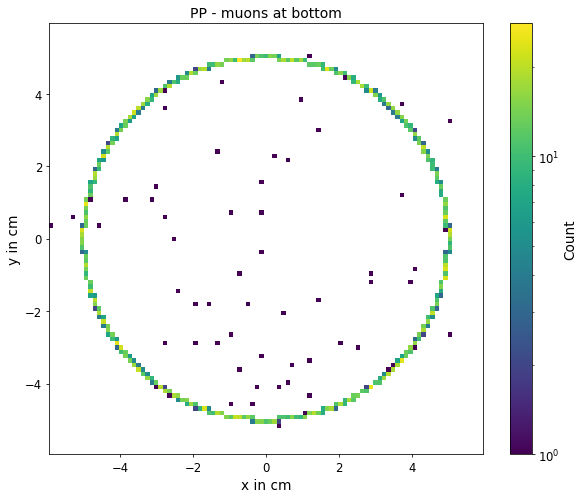

In [14]:
from matplotlib.colors import LogNorm

df = pd.read_hdf(cfg.hdf_folder + cfg.file_name_results, key='main')
# df = df[df['point2z'] <= cfg.detector_bottom_depth]
x = df['point2x']
y = df['point2y']

bin_size = 100  # Adjust the bin size as needed
edge = np.max([-x.min(), x.max(), -y.min(), y.max()])
xbins = np.linspace(-edge, edge, bin_size)
ybins = np.linspace(-edge, edge, bin_size)

plt.figure(figsize=(10, 8))
plt.hist2d(x, y, bins=[xbins, ybins], norm=LogNorm())
plt.xlabel('x in cm')
plt.ylabel('y in cm')
plt.title('PP - muons at bottom')
cbar = plt.colorbar()
cbar.set_label('Count')
plt.savefig(f'figures/{cfg.subfolder}PP - Bottom Histogram')

In [15]:
# outer_radius = 1.94655
# count_over_100 = np.sum(r > outer_radius)

# # Total number of elements in the array
# total_elements = r.size

# # Calculate the percentage
# percentage_over_100 = (count_over_100 / total_elements) * 100

# print(f"Percentage of values over {outer_radius}: {percentage_over_100:.6} %")

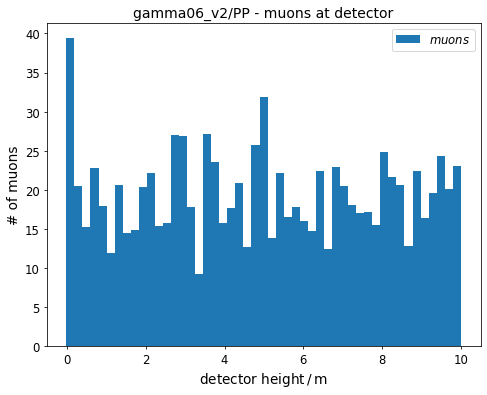

In [16]:
# muons at detector in detector coordinates
a = (df_pp['point2z'] - (cfg.detector_pos[2] - cfg.detector_height/2))/100
plib.plot_hist(
    a,
    ylabel = '# of muons',
    xlabel1 = r'\text{detector height}',
    xlabel2 = 'm',
    label=r'$muons$',
    name=f'{cfg.subfolder}PP - muons at detector',
    xlog=False,
    binsize=50,
    weights=weights_pp,
    histtype='bar')

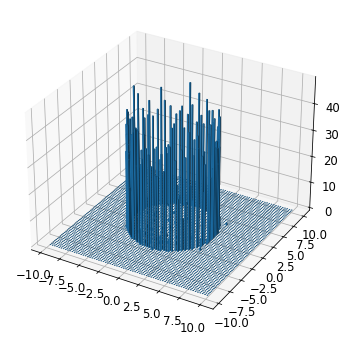

In [17]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
r = 10
bins = 70
hist, xedges, yedges = np.histogram2d(x, y, bins=bins, range=[[-r, r], [-r, r]])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = r/bins * np.ones_like(zpos)
dz = hist.ravel()
# dz = np.log(hist.ravel() + 1)  # Adding 1 to avoid log(0)

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')
plt.savefig(f'figures/{cfg.subfolder}PP - testplot_distance 3D from detector bottom{bins}.pdf', bbox_inches="tight")

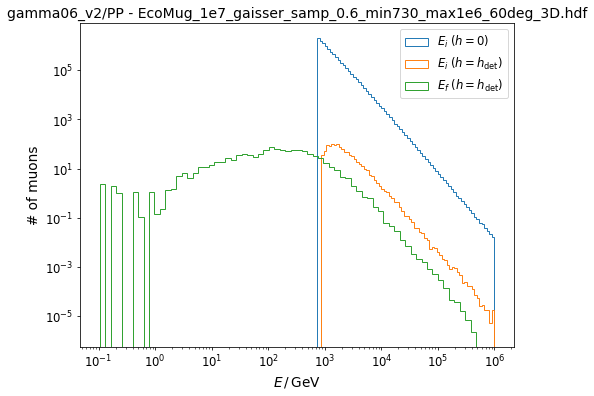

In [18]:
plt.rcParams['figure.figsize'] = (8, 6)
# Initial energy of the muons (blue)
plib.plot_hist(
    df_EM['energy'], 
    label=r'$E_i \;(h=0)$',
    binsize=70,
    xlog=True,
    show_or_multiplot='multi',
    weights=weights_EM,
    histtype='step'
)

# Initial energy of the muons that arrived at the detector (orange)
bins_energies_i = plib.plot_hist(
    df_pp['energies_i']/1000, 
    label=r'$E_i \;(h=h_{\mathrm{det}})$',
    xlog=True,
    binsize=70,
    show_or_multiplot='multi',
    weights=weights_pp,
    histtype='step'
)
# Final energy of the muons that arrived at the detector (orange)
plib.plot_hist(
    df_pp['energies_f']/1000, 
    name=f'{cfg.subfolder}PP - {cfg.file_name_}',
    ylabel = '# of muons',
    xlabel1 = 'E',
    xlabel2 = 'GeV',
    label=r'$E_f \;(h=h_{\mathrm{det}})$',
    show_or_multiplot='show',
    xlog=True,
    binsize=70,
    savefig=True,
    weights=weights_pp,
    histtype='step'
)

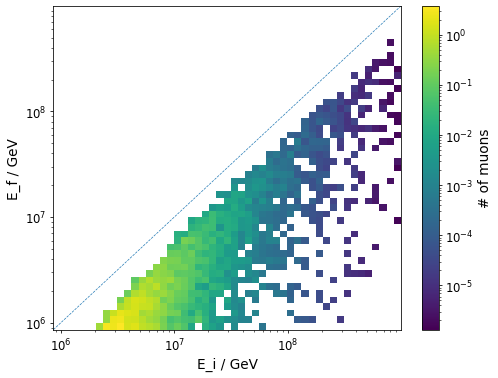

In [19]:
bins = np.geomspace(min(df_pp["energies_i"]), max(df_pp["energies_i"]), 50)
plt.hist2d(df_pp["energies_i"], df_pp["energies_f"], bins=(bins, bins), norm=mpl.colors.LogNorm(), weights=weights_pp)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('E_i / GeV')
plt.ylabel('E_f / GeV')
plt.plot(bins, bins, linestyle="--", linewidth=0.7)
cbar = plt.colorbar()
cbar.set_label('# of muons') 

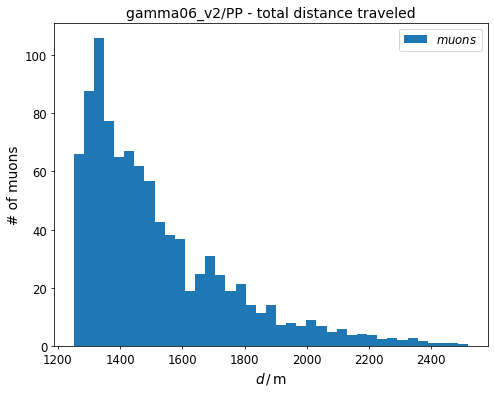

In [20]:
# total distance traveled
plib.plot_hist(
    df_pp['distances']/100, 
    name=f'{cfg.subfolder}PP - total distance traveled',
    ylabel = '# of muons',
    xlabel1 = 'd',
    xlabel2 = 'm',
    label=r'$muons$',
    xlog=False,
    binsize=40,
    savefig=True,
    weights=weights_pp,
    histtype='bar'
)

# Calculate Detector Rate

In [21]:
from scipy.integrate import dblquad
from uncertainties import ufloat
reload(cfg)

# calculate a muon flux of a given detector at sea level (using gaisser function)
total_flux_nom, total_flux_unc = (2*np.pi*sol for sol in dblquad(cfg.gaisser_wanted,
    float(cfg.min_E),                           float(cfg.max_E),
    lambda E: np.radians(float(cfg.min_theta)), lambda E: np.radians(float(cfg.max_theta))
    ))

total_flux = ufloat(total_flux_nom, total_flux_unc)
print(f'{total_flux:.3} muons per second per cm^2 per s at sea level are expected for given integration limits')

detector_area = cfg.detector_artificial_area
total_flux_per_day_per_detector_area = total_flux*60*60*24*detector_area

print(f'detector radius = {cfg.detector_target_circle:.2} cm | artificial_detector_area = {detector_area:.2} cm^2')
print(f'{total_flux_per_day_per_detector_area:.2} Muons per Day for artificial detector surface on sea level (with numerical error)')

backweighted_hits_at_detector = np.sum(weights_pp)
detector_hits = ufloat(backweighted_hits_at_detector, np.sqrt(backweighted_hits_at_detector))
percent_of_muons_arrived = detector_hits/cfg.STATISTICS
print(f"\nMuons arrived at detector backweighted: {detector_hits} (Poisson-uncertainty)")
detector_rate = total_flux_per_day_per_detector_area*percent_of_muons_arrived
# print(f'{total_flux_per_day_per_detector_area.nominal_value*percent_of_muons_arrived:.1f} muons per Day (The real detectorrate!)')
print(f'{total_flux_per_day_per_detector_area*percent_of_muons_arrived:.1f} Muons per Day (The real detectorrate!)')

(9.05+/-0.14)e-07 muons per second per cm^2 per s are expected for given integration limits
detector radius = 1.7e+03 cm | artificial_detector_area = 9.4e+06 cm^2
(7.4+/-0.1)e+05 Muons per Day for artificial detector surface on sea level (with numerical error)

Muons arrived at detector backweighted: 961+/-31 (Poisson-uncertainty)
70.8+/-2.5 Muons per Day (The real detectorrate!)


# Measurement time

In [25]:
def t(delta_h, Phi_800):
    # delta_h : wanted water depth accuracy
    # Phi_800 : detectorrate at -1200m with water from -400m to -1200m (800m)
    #   so 800m water above detector is lowest possible detector rate "worst case scenario"
    delta_N = 0.0155  # 1.55 % change in detectorrate per 100m water (source: bachelors thesis)
    delta_N = delta_h/100 * (delta_N)  # reweighting delta_N to a new depth accuracy
    return 1/(delta_N**2*Phi_800)

delta_h = 100  # wanted water depth accuracy
measurement_time = t(delta_h, detector_rate)*12/365

A = np.pi*(cfg.detector_radius/2)**2
print(f'Area: {A:.1f} cm^2\nprecision: {delta_h} m\nmeasurement time: {measurement_time:.1f} month')

Area: 19.6 cm^2
precision: 100 m
measurement time: 1.9+/-0.1 month


# Result Plot
To create the result-plot, you need to simulate each "water depth" separately.
Then you need to write the results into a txt file.
Format: 
This is read by the following code and the results plot can be created.

Currently `results/results-counts_BA.txt` hold my bachelors results.

In [23]:
# The results plot... needs some work to make it more automatic and do the actual simulations
# probably not working currently

# from numpy import loadtxt
# from uncertainties import unumpy

# results = loadtxt('results/results-counts_BA.txt', delimiter=';')

# depth = results[:,1]
# counts = results[:,0]
# # STATISTICS = cfg.STATISTICS
# STATISTICS = 1e7  # bachelor thesis results value
# # counts_err = unumpy.uarray(counts, np.sqrt(counts))
# # detektorrate = muon_rate*counts_err/STATISTICS
# detektorrate = muon_rate*counts/STATISTICS

# plt.style.use('seaborn-whitegrid')
# # plt.errorbar(
# #     depth, unumpy.nominal_values(detektorrate), 
# #     yerr=unumpy.std_devs(detektorrate), fmt='vr', label='simulation data')
# plt.scatter(
#     depth, detektorrate, label='simulation data')
# plt.ylabel('counts per day')
# plt.xlabel('water depth')
# plt.legend()
# # plt.savefig('results_plot.pdf', dpi=1000)